In [1]:
import tensorflow as tf
from tensorflow import keras
#model = tf.saved_model.load(r"C:/Users/DELL/OneDrive/Documents/Mini project/1680430328")
model = tf.keras.models.load_model(r"C:\Users\DELL\OneDrive\Documents\Mini project\FINAL\plant_disease_detection.h5")

In [2]:
image_size = 224
input_shape = (image_size, image_size, 3)
mbnet_v2 = keras.applications.MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=input_shape
)
mbnet_v2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 38)                48678     
                                                                 
Total params: 2,306,662
Trainable params: 48,678
Non-trainabl

In [4]:
classes = ['Apple___Apple_scab',
           'Apple___Black_rot',
           'Apple___Cedar_apple_rust',
           'Apple___healthy',
           'Blueberry___healthy',
           'Cherry_(including_sour)___Powdery_mildew',
           'Cherry_(including_sour)___healthy',
           'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
           'Corn_(maize)___Common_rust_',
           'Corn_(maize)___Northern_Leaf_Blight',
           'Corn_(maize)___healthy',
           'Grape___Black_rot',
           'Grape___Esca_(Black_Measles)',
           'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
           'Grape___healthy',
           'Orange___Haunglongbing_(Citrus_greening)',
           'Peach___Bacterial_spot',
           'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
           'Pepper,_bell___healthy',
           'Potato___Early_blight',
           'Potato___Late_blight',
           'Potato___healthy',
           'Raspberry___healthy',
           'Soybean___healthy',
           'Squash___Powdery_mildew',
           'Strawberry___Leaf_scorch',
           'Strawberry___healthy',
           'Tomato___Bacterial_spot',
           'Tomato___Early_blight',
           'Tomato___Late_blight',
           'Tomato___Leaf_Mold',
           'Tomato___Septoria_leaf_spot',
           'Tomato___Spider_mites Two-spotted_spider_mite',
           'Tomato___Target_Spot',
           'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
           'Tomato___Tomato_mosaic_virus',
           'Tomato___healthy']

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

filename = r"C:\Users\DELL\Downloads\w4.jpg"
img = cv2.imread(filename)
img = cv2.resize(img, (224, 224) )
img = img /224
image_array = np.array(img)
image_array = np.reshape(image_array, (1, 224, 224, 3))

In [6]:
predictions = model.predict(image_array)
predictions

1/1 [==============================] - 1s 1s/step


array([[6.25232888e-09, 1.16066958e-05, 1.47352976e-05, 2.41262982e-10,
        7.67177255e-09, 2.14818896e-09, 8.68484312e-06, 1.27253251e-03,
        2.17593806e-05, 3.08911035e-06, 6.91144351e-07, 1.18860362e-08,
        9.82259962e-07, 1.12641927e-11, 1.91999083e-09, 3.81312384e-06,
        1.18537926e-07, 3.05057733e-06, 6.43818915e-01, 7.70484209e-02,
        4.47225990e-09, 8.98779939e-11, 2.53739030e-10, 3.62457814e-10,
        1.23152238e-10, 5.12380503e-13, 1.70055241e-03, 1.16002488e-08,
        4.52969107e-06, 2.64790088e-01, 9.93932411e-03, 2.74301390e-04,
        1.78325936e-04, 1.96920826e-08, 8.94381839e-04, 9.82474012e-06,
        4.80835283e-08, 7.98995572e-08]], dtype=float32)

In [7]:
np.argmax(predictions)

18

def predict(image):
    probabilities = model.predict(image)[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

In [8]:
def predict(image):
    probabilities = model.predict(image)[0]
    max_prob = np.max(probabilities)
    if max_prob < 0.6:
        return {"No class": 0.0}
    else:
        class_idx = np.argmax(probabilities)
        return {classes[class_idx]: probabilities[class_idx]}

1/1 [==============================] - 0s 56ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PREDICTED: class: Pepper,_bell___Bacterial_spot, confidence: 0.643819


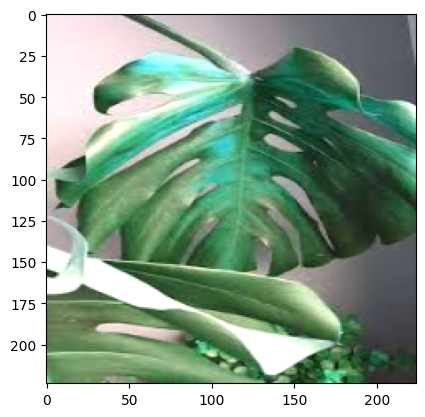

In [9]:
prediction = predict(image_array)
print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
plt.imshow(img)

In [28]:
sample = [2.3140030e-08, 2.1482537e-08, 1.0277550e-09, 5.5861289e-08,
          2.9246805e-06, 1.0756150e-04, 1.7171962e-11, 1.3041112e-07,
          2.2130565e-10, 2.8451011e-11, 1.0487725e-11, 2.4884628e-10,
          5.7605004e-10, 5.3827044e-11, 5.3052052e-09, 6.2297339e-08,
          1.7916770e-08, 2.4812659e-08, 8.3490750e-06, 8.5228727e-05,
          8.3119609e-09, 5.2507268e-04, 9.9548930e-01, 1.7230383e-07,
          2.0455458e-07, 1.8148014e-10, 4.1870245e-09, 2.7065155e-06,
          2.0134994e-08, 3.5305475e-06, 9.4338600e-07, 3.4675075e-08,
          6.7243661e-07, 1.2354151e-04, 2.5904886e-04, 3.3641160e-03,
          2.1307831e-05, 4.9369169e-06]
# normalized predictions

In [29]:
temp = sum(sample)
print(temp)

1.0000000284257986


In [10]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# Load the pre-trained model from H5 file
model = tf.keras.models.load_model(r"C:\Users\DELL\OneDrive\Documents\Mini project\FINAL\plant_disease_detection.h5")

# Define the class labels
classes = ['Apple___Apple_scab',
           'Apple___Black_rot',
           'Apple___Cedar_apple_rust',
           'Apple___healthy',
           'Blueberry___healthy',
           'Cherry_(including_sour)___Powdery_mildew',
           'Cherry_(including_sour)___healthy',
           'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
           'Corn_(maize)___Common_rust_',
           'Corn_(maize)___Northern_Leaf_Blight',
           'Corn_(maize)___healthy',
           'Grape___Black_rot',
           'Grape___Esca_(Black_Measles)',
           'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
           'Grape___healthy',
           'Orange___Haunglongbing_(Citrus_greening)',
           'Peach___Bacterial_spot',
           'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
           'Pepper,_bell___healthy',
           'Potato___Early_blight',
           'Potato___Late_blight',
           'Potato___healthy',
           'Raspberry___healthy',
           'Soybean___healthy',
           'Squash___Powdery_mildew',
           'Strawberry___Leaf_scorch',
           'Strawberry___healthy',
           'Tomato___Bacterial_spot',
           'Tomato___Early_blight',
           'Tomato___Late_blight',
           'Tomato___Leaf_Mold',
           'Tomato___Septoria_leaf_spot',
           'Tomato___Spider_mites Two-spotted_spider_mite',
           'Tomato___Target_Spot',
           'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
           'Tomato___Tomato_mosaic_virus',
           'Tomato___healthy']

# Define the input and output interfaces
inputs = gr.inputs.Image()
outputs = gr.outputs.Label(num_top_classes=len(classes))

def predict(image):
    img = image.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    image_array = np.array(img)
    image_array = np.reshape(image_array, (1, 224, 224, 3))
    probabilities = model.predict(image_array)[0]
    max_prob = np.max(probabilities)
    if max_prob < 0.6:
        return {"No class": 0.0}
    else:
        class_idx = np.argmax(probabilities)
        return {classes[class_idx]: float(probabilities[class_idx])}

iface = gr.Interface(fn=predict, inputs=inputs, outputs=outputs, 
                     title='Multi-class Image Classification', 
                     description=f'Classify an image into one of {len(classes)} classes.')


# Launch the web interface
iface.launch()

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\DELL\AppDa

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 80ms/step
